In [ ]:
import tqdm
import glob
import json
import pandas as pd
import numpy as np

## 'list_label' :  json 파일 경로 리스트
path_label = '/content/drive/MyDrive/canAiry/data/02_2nd-dataset/03-2_TR-gearbox/01_label/train'
list_label = glob.glob(path_label + '/*.json')


In [ ]:
list_label

[]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

n = []
ab = []

for path_label in list_label:
  with open(path_label) as r:
    dict_label = json.load(r)
    tmp = path_label.split('/')
    tmp[-3] = '00_csv'
    tmp2 = tmp[-1].split('.')
    tmp2[-1] = 'csv'
    tmp[-1] = '.'.join(tmp2)
    path_csv ='/'.join(tmp)

    try: 
      df = pd.read_csv(path_csv)
      env = []
      env.append(float(df.columns[0].split(';')[-1]))
      for i in range(4):
        env.append(float(df.loc[i][0].split(';')[-1]))
      
      df_temp = pd.read_csv(path_csv)[4:].reset_index(drop=True)
      image = np.zeros((512, 640))
      for idx, row in df_temp.iterrows():
        image[idx, :] = np.array([float(x) for x in row[0].split(';')[:-1]])

      for obj in dict_label["annotations"]:
        bbox = list(obj["data"].values())
        x = bbox[0]
        y = bbox[1]
        w = bbox[2]
        h = bbox[3]
        
        tmp = []
        for i in range(h):
            for j in range(w):
              if y+i >= 512 or x+j >= 640:
                continue
              tmp.append(image[y+i][x+j])
        tmp.sort(reverse=True)
        if obj["attributes"]["status"] == "danger":
          #
          tmp = tmp[0:5]
          tmp.extend(env)
          ab.append(tmp)
        else:
          tmp = tmp[0:5]
          tmp.extend(env)
          n.append(tmp)
          
    except:
      print(path_csv, 'is not here!!')

In [ ]:
print(len(n))
print(len(ab))

736
330


In [ ]:
half_n = n[:330]

In [ ]:
df_normal = pd.DataFrame(half_n,columns=['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity'])
df_abnormal = pd.DataFrame(ab,columns=['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity'])

In [ ]:
print(len(df_normal))
print(len(df_abnormal))

330
330


In [ ]:
dataset_train = pd.concat([df_normal, df_abnormal], ignore_index=True)

In [ ]:
dataset_train

,1,2,3,4,5,Emissivity,ReflectedTemperature,Distance,Atmospherictemperature,RelativeHumidity
0,37.73,37.38,37.27,37.05,36.80,0.95,19.00,1.0,19.0,20.0
1,75.49,75.27,75.14,75.14,75.04,0.95,19.00,1.0,19.0,20.0
2,106.96,105.04,101.46,100.54,100.08,0.95,19.00,1.0,19.0,20.0
3,60.78,59.89,59.71,59.21,58.97,0.95,19.00,1.0,19.0,20.0
4,74.66,74.63,74.59,74.55,74.55,0.95,19.00,1.0,19.0,20.0
...,...,...,...,...,...,...,...,...,...,...
655,59.61,58.41,57.14,56.17,54.35,0.95,12.00,1.0,12.0,70.0
656,64.68,64.62,64.60,64.60,64.57,0.95,12.00,1.0,12.0,70.0
657,62.09,60.89,60.51,60.20,59.97,0.95,12.00,1.0,12.0,70.0
658,75.38,75.31,75.14,75.11,75.09,0.95,12.00,1.0,12.0,70.0


In [ ]:
tmp = []
for _ in range(len(half_n)):
  tmp.append(1)
for _ in range(len(ab)):
  tmp.append(0)

dataset_train['target'] = tmp

In [ ]:
dataset_train

,1,2,3,4,5,Emissivity,ReflectedTemperature,Distance,Atmospherictemperature,RelativeHumidity,target
0,37.73,37.38,37.27,37.05,36.80,0.95,19.00,1.0,19.0,20.0,1
1,75.49,75.27,75.14,75.14,75.04,0.95,19.00,1.0,19.0,20.0,1
2,106.96,105.04,101.46,100.54,100.08,0.95,19.00,1.0,19.0,20.0,1
3,60.78,59.89,59.71,59.21,58.97,0.95,19.00,1.0,19.0,20.0,1
4,74.66,74.63,74.59,74.55,74.55,0.95,19.00,1.0,19.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
655,59.61,58.41,57.14,56.17,54.35,0.95,12.00,1.0,12.0,70.0,0
656,64.68,64.62,64.60,64.60,64.57,0.95,12.00,1.0,12.0,70.0,0
657,62.09,60.89,60.51,60.20,59.97,0.95,12.00,1.0,12.0,70.0,0
658,75.38,75.31,75.14,75.11,75.09,0.95,12.00,1.0,12.0,70.0,0


In [ ]:
## 'list_label' :  json 파일 경로 리스트
path_label = '/content/drive/MyDrive/canAiry/data/02_2nd-dataset/03-2_TR-gearbox/01_label/test'
list_label = glob.glob(path_label + '/*.json')

n = []
ab = []

for path_label in list_label:
  with open(path_label) as r:
    dict_label = json.load(r)
    tmp = path_label.split('/')
    tmp[-3] = '00_csv'
    tmp2 = tmp[-1].split('.')
    tmp2[-1] = 'csv'
    tmp[-1] = '.'.join(tmp2)
    path_csv ='/'.join(tmp)

    try: 
      df = pd.read_csv(path_csv)
      env = []
      env.append(float(df.columns[0].split(';')[-1]))
      for i in range(4):
        env.append(float(df.loc[i][0].split(';')[-1]))
      
      df_temp = pd.read_csv(path_csv)[4:].reset_index(drop=True)
      image = np.zeros((512, 640))
      for idx, row in df_temp.iterrows():
        image[idx, :] = np.array([float(x) for x in row[0].split(';')[:-1]])

      for obj in dict_label["annotations"]:
        bbox = list(obj["data"].values())
        x = bbox[0]
        y = bbox[1]
        w = bbox[2]
        h = bbox[3]
        
        tmp = []
        for i in range(h):
            for j in range(w):
              if y+i >= 512 or x+j >= 640:
                continue
              tmp.append(image[y+i][x+j])
        tmp.sort(reverse=True)
        if obj["attributes"]["status"] == "danger":
          #
          tmp = tmp[0:5]
          tmp.extend(env)
          ab.append(tmp)
        else:
          tmp = tmp[0:5]
          tmp.extend(env)
          n.append(tmp)
          
    except:
      print(path_csv, 'is not here!!')

In [ ]:
print(len(n))
print(len(ab))

98
40


In [ ]:
half_n=n[:40]

In [ ]:
df_normal = pd.DataFrame(half_n,columns=['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity'])
df_abnormal = pd.DataFrame(ab,columns=['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity'])

dataset_test = pd.concat([df_normal, df_abnormal], ignore_index=True)

tmp = []
for _ in range(len(half_n)):
  tmp.append(1)
for _ in range(len(ab)):
  tmp.append(0)

dataset_test['target'] = tmp

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset_test[['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity']].head()
dataset_test['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train= dataset_train[['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity']]
X_test= dataset_test[['1','2','3','4','5','Emissivity','ReflectedTemperature','Distance','Atmospherictemperature','RelativeHumidity']]
y_train= dataset_train['target']
y_test = dataset_test['target']

In [ ]:
len(X_train)

660

In [ ]:
len(X_test)

80

In [ ]:
len(y_train)

660

In [ ]:
len(y_test)

80

In [ ]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Support Vector Machines
from sklearn.svm import SVC
models['SVC'] = SVC(C=1.0, 
                      kernel='rbf',
                      degree=3,
                      gamma='scale',
                      coef0=0.0,
                      shrinking=True,
                      probability=False,
                      tol=0.001,
                      cache_size=200,
                      class_weight=None,
                      verbose=False, 
                      max_iter=- 1, 
                      decision_function_shape='ovr', 
                      break_ties=False, random_state=None)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.6125,0.325,0.764706
Support Vector Machines,0.6500,0.525,0.700000
SVC,0.5000,1.000,0.500000
Decision Trees,0.5250,0.575,0.522727
Random Forest,0.5000,0.575,0.500000
Naive Bayes,0.5000,1.000,0.500000
K-Nearest Neighbor,0.4875,0.600,0.489796


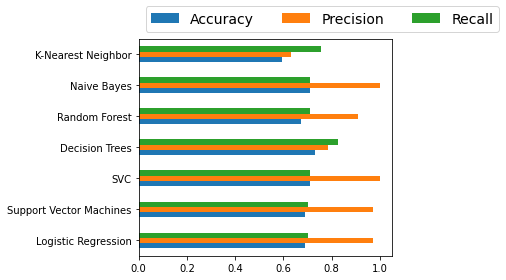

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:
# 실제로는 unbalance(ab>n)
# recal = sensitivity metric 평가
# metric이 어떤의미를 가지는지 이해
# baseline 
# test train val 같이 나누기(사전에 맞추기)

In [ ]:
len(n)

98

In [ ]:
len(ab)

40